# Modelado estadístico para inferir la pobreza en México
## 1. Planteamiento del problema y objetivo del estudio

El presente estudio tiene como objetivo modelar e inferir los factores 
asociados al porcentaje de población en situación de pobreza a nivel estatal 
en México.

Todas las variables utilizadas en este análisis fueron obtenidas a partir 
de fuentes oficiales del Instituto Nacional de Estadística y Geografía (INEGI), 
garantizando consistencia metodológica y confiabilidad en la información.

Se seleccionaron indicadores socioeconómicos relacionados con mercado laboral, 
capital humano, inversión y bienestar subjetivo, con el propósito de analizar 
su asociación estadística con la pobreza.

El enfoque del estudio es inferencial, buscando identificar patrones 
estructurales regionales mediante modelos de regresión lineal y no lineal, 
así como evaluar su capacidad de generalización.

In [1]:
import pandas as pd

# Cargar datos desde Excel
df_raw = pd.read_excel("base final.xlsx")

# Variable objetivo definida para todo el proyecto
TARGET = "Porcentaje de la población en situación de pobreza"

# Mostrar columnas para confirmar que el dataset contiene la variable objetivo
print("Columnas disponibles:")
print(list(df_raw.columns))

print("\nVariable objetivo seleccionada:")
print(TARGET)


Columnas disponibles:
['Estado', '\xa0Casos de prevalencia delictiva por cada 100 mil habitantes', 'Total de personas con edad laboral (15-69)', 'Indice de horas trabajadas', 'Personas Alfabetizadas', 'profesionistas ocupados', 'Inversion_extranjera_mdd', 'salario mensual', 'PIBE millones de pesos', 'Porcentaje de la población en situación de pobreza', 'Tasa de participación económica', 'Satisfacción con la vida', 'Confianza en la policía']

Variable objetivo seleccionada:
Porcentaje de la población en situación de pobreza


## 2. Origen y contexto de los datos
Los datos utilizados fueron recopilados a partir de distintas secciones 
del portal oficial del INEGI.

Dado que las variables provienen de diferentes módulos estadísticos, 
fue necesario realizar un proceso de integración y consolidación 
de la información.

Para ello, se agruparon todas las variables seleccionadas en una base 
de datos propia denominada "base final.xlsx", en la cual cada fila 
representa una entidad federativa y cada columna corresponde 
a un indicador socioeconómico específico.

Este proceso permitió:

- Homogeneizar formatos.
- Verificar consistencia entre variables.
- Asegurar que todas las observaciones correspondieran 
  al mismo periodo de análisis.

La base consolidada fue posteriormente importada al entorno de análisis 
en Python para realizar el modelado estadístico.

El conjunto de datos utilizado en este estudio contiene información correspondiente 
a las 32 entidades federativas de México. Cada observación representa una entidad 
y sus respectivos indicadores económicos, sociales e institucionales.

Los datos provienen de fuentes oficiales nacionales y estadísticas públicas, 
lo cual garantiza su confiabilidad y relevancia para el análisis.

Las variables incluidas pueden clasificarse en tres grandes dimensiones:

1. Indicadores económicos:
   - Salario mensual promedio.
   - Inversión extranjera directa.
   - Tasa de participación económica.
   - Producto Interno Bruto Estatal (PIBE).

2. Indicadores de capital humano:
   - Personas alfabetizadas.
   - Profesionistas ocupados.
   - Población en edad laboral.

3. Indicadores sociales e institucionales:
   - Satisfacción con la vida.
   - Confianza en la policía.
   - Prevalencia delictiva.

La variable objetivo del estudio es:

**Porcentaje de la población en situación de pobreza**

Esta variable representa la proporción de habitantes en cada estado que 
se encuentran en condición de pobreza según mediciones oficiales.

Dado que el análisis se realiza a nivel agregado estatal, las conclusiones 
deben interpretarse como patrones regionales y no individuales.


In [2]:
# Eliminar variable categórica (Estado) para análisis numérico
df = df_raw.drop(columns=["Estado"], errors="ignore")

# Convertir a numérico si es necesario
df = df.apply(pd.to_numeric, errors="coerce")

# Eliminar valores faltantes
df = df.dropna()

print("Número de observaciones:", df.shape[0])
print("Número de variables:", df.shape[1])

print("\nTipos de variables:")
print(df.dtypes)

print("\nPrimeras filas del dataset:")
df.head()


Número de observaciones: 32
Número de variables: 12

Tipos de variables:
 Casos de prevalencia delictiva por cada 100 mil habitantes      int64
Total de personas con edad laboral (15-69)                       int64
Indice de horas trabajadas                                     float64
Personas Alfabetizadas                                           int64
profesionistas ocupados                                          int64
Inversion_extranjera_mdd                                       float64
salario mensual                                                  int64
PIBE millones de pesos                                           int64
Porcentaje de la población en situación de pobreza             float64
Tasa de participación económica                                float64
Satisfacción con la vida                                       float64
Confianza en la policía                                        float64
dtype: object

Primeras filas del dataset:


,Casos de prevalencia delictiva por cada 100 mil habitantes,Total de personas con edad laboral (15-69),Indice de horas trabajadas,Personas Alfabetizadas,profesionistas ocupados,Inversion_extranjera_mdd,salario mensual,PIBE millones de pesos,Porcentaje de la población en situación de pobreza,Tasa de participación económica,Satisfacción con la vida,Confianza en la policía
0,29473,977657,96.4,1015427,124674,394.13,18387,833913,23.7,59.3,8.6,70.3
1,20647,2731922,94.3,2817601,320760,1809.07,21016,13318,13.4,61.0,8.7,43.5
2,18827,568313,123.3,582156,83222,366.94,22907,20079,13.3,68.4,8.6,63.0
3,18610,638909,71.3,642004,67487,126.61,17256,7435,45.1,61.3,8.3,55.5
4,20007,2171167,90.7,2269840,226094,101.24,13732,6758,18.2,61.1,8.8,65.2


El código anterior realizó los siguientes pasos:

1. Eliminó la variable categórica "Estado" para permitir el análisis numérico.
2. Convirtió todas las variables a formato numérico cuando fue posible.
3. Eliminó observaciones con valores faltantes.
4. Mostró el número total de observaciones y variables disponibles.
5. Verificó el tipo de cada variable.
6. Presentó las primeras filas del dataset para confirmar su estructura.

Después de la limpieza, el conjunto final contiene 32 observaciones 
correspondientes a las entidades federativas.


## 3. Exploración y comprensión del conjunto de datos

Antes de construir cualquier modelo, es fundamental comprender 
la estructura estadística del conjunto de datos.

En esta sección se realiza un análisis descriptivo inicial 
para identificar:

- Rango de valores.
- Media y dispersión.
- Posibles outliers.
- Escalas heterogéneas.
- Distribución de la variable objetivo.

El objetivo no es aún modelar, sino entender el comportamiento 
básico de las variables.


In [3]:
# Estadísticos descriptivos generales
df.describe()


,Casos de prevalencia delictiva por cada 100 mil habitantes,Total de personas con edad laboral (15-69),Indice de horas trabajadas,Personas Alfabetizadas,profesionistas ocupados,Inversion_extranjera_mdd,salario mensual,PIBE millones de pesos,Porcentaje de la población en situación de pobreza,Tasa de participación económica,Satisfacción con la vida,Confianza en la policía
count,32.000000,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,22366.031250,2.728391e+06,91.925000,2.791273e+06,2.962691e+05,978.350312,17497.906250,51533.65625,34.534375,60.384375,8.481250,56.334375
std,4845.291279,2.330786e+06,17.306721,2.414206e+06,3.149971e+05,2477.584987,3110.169847,145000.84394,14.934235,3.312743,0.182169,8.161618
min,15576.000000,5.165810e+05,25.000000,5.367840e+05,6.748700e+04,42.270000,13588.000000,1373.00000,13.300000,53.100000,8.200000,38.800000
25%,18868.250000,1.304616e+06,86.125000,1.319197e+06,1.313925e+05,132.842500,15788.250000,10338.25000,21.700000,58.550000,8.300000,51.025000
50%,20735.500000,2.109730e+06,95.350000,2.173350e+06,2.056400e+05,364.110000,16807.000000,17541.50000,33.650000,60.700000,8.500000,56.300000
75%,25022.500000,3.253773e+06,101.150000,3.205476e+06,3.209830e+05,903.065000,18456.000000,34743.50000,44.425000,61.425000,8.600000,60.875000
max,34851.000000,1.207917e+07,123.300000,1.245814e+07,1.444711e+06,14184.370000,28256.000000,833913.00000,67.400000,68.400000,8.800000,73.800000


La tabla anterior muestra medidas de tendencia central y dispersión 
para cada variable:

- La media permite comparar magnitudes promedio entre estados.
- La desviación estándar muestra el grado de variabilidad regional.
- Los valores mínimo y máximo permiten identificar diferencias 
  estructurales importantes entre entidades.

Se observa que las variables económicas presentan escalas muy distintas 
(por ejemplo, inversión extranjera frente a porcentajes), lo cual 
puede generar problemas de interpretación si no se tiene cuidado.


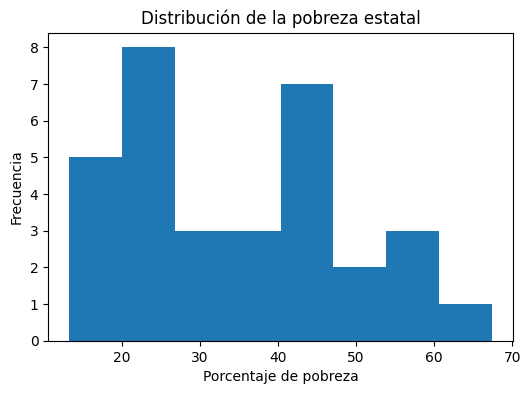

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["Porcentaje de la población en situación de pobreza"], bins=8)
plt.title("Distribución de la pobreza estatal")
plt.xlabel("Porcentaje de pobreza")
plt.ylabel("Frecuencia")
plt.show()


La gráfica muestra la distribución del porcentaje de pobreza entre estados.

Se observa variabilidad considerable, lo cual sugiere que existen 
diferencias estructurales importantes entre entidades federativas.

La distribución no presenta sesgos extremos, lo que favorece 
el uso inicial de modelos lineales.


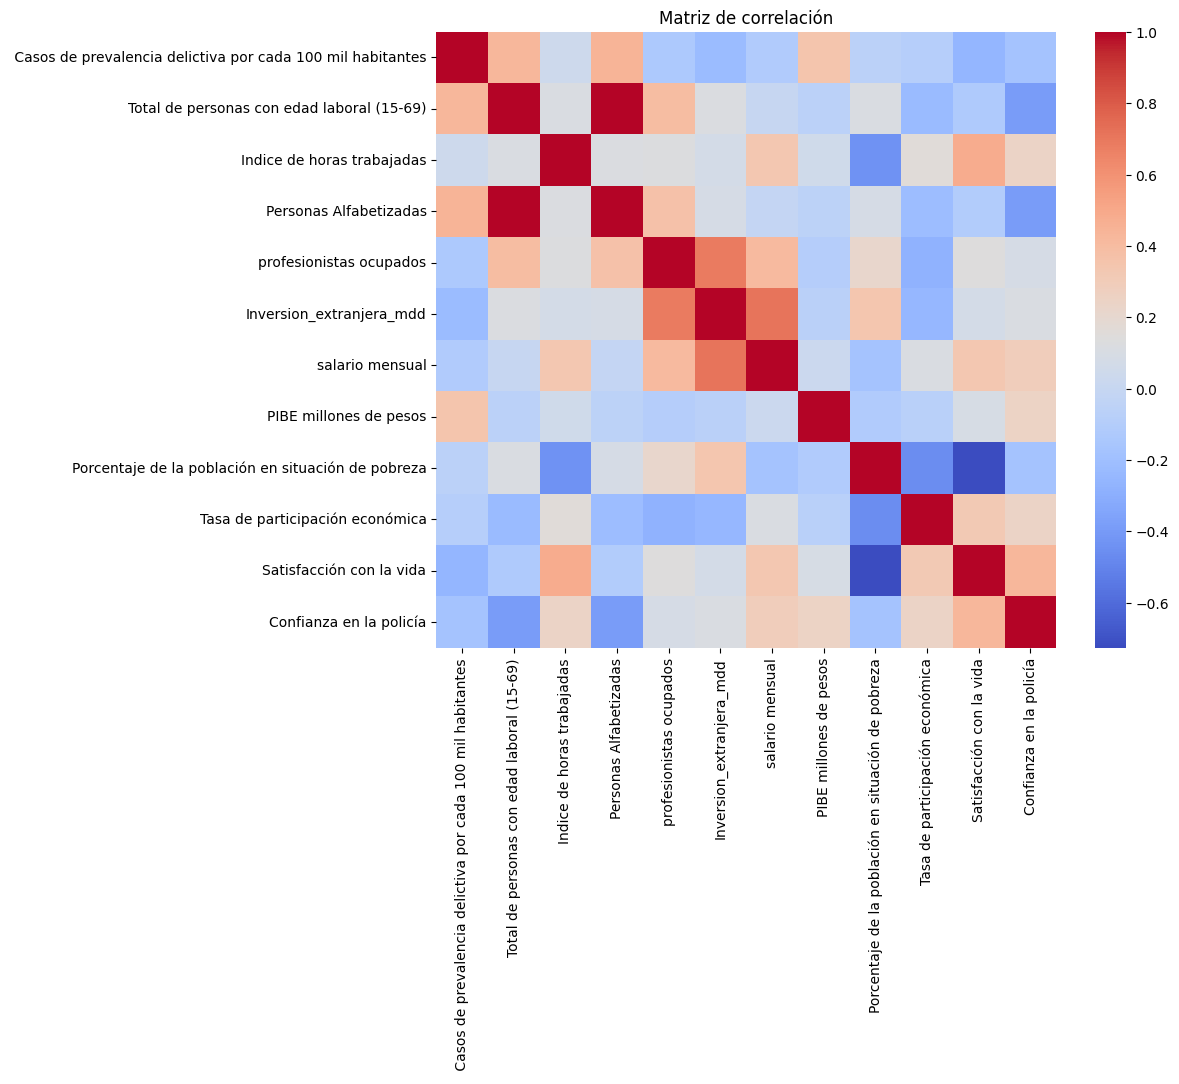

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


### Interpretación de la matriz de correlación

La matriz de correlación permite analizar la intensidad y dirección 
de las asociaciones lineales entre las variables del estudio.

En primer lugar, se observa que existen correlaciones elevadas entre 
algunas variables de capital humano y variables económicas, como:

- Personas alfabetizadas y profesionistas ocupados.
- Profesionistas ocupados y salario mensual.
- Inversión extranjera y salario mensual.

Estas correlaciones sugieren posible multicolinealidad, lo cual es 
esperable en datos socioeconómicos donde múltiples indicadores 
miden dimensiones similares del desarrollo regional.

En relación con la variable objetivo (porcentaje de población en situación de pobreza), 
se identifican patrones relevantes:

- Existe una correlación negativa notable entre pobreza y salario mensual.
  Esto indica que estados con mayores niveles salariales tienden a presentar 
  menores niveles de pobreza.

- Se observa una correlación negativa importante entre pobreza y 
  satisfacción con la vida, lo cual sugiere que estados con mayor bienestar 
  subjetivo tienden a registrar menores niveles de pobreza.

- Algunas variables institucionales presentan correlaciones más débiles, 
  lo cual indica que su relación lineal directa con la pobreza es menos evidente.

En conjunto, la matriz sugiere que variables económicas y de bienestar 
subjetivo podrían desempeñar un papel relevante en el modelado de la pobreza, 
aunque también advierte sobre la necesidad de aplicar procedimientos 
de selección de características para evitar problemas de redundancia.


## 4. Preparación y tratamiento de los datos

Los conjuntos de datos reales suelen presentar múltiples desafíos 
que deben abordarse antes del modelado.

En este estudio se identificaron y trataron explícitamente 
los siguientes problemas:

1. Valores faltantes.
2. Escalas heterogéneas.
3. Posible multicolinealidad.
4. Tamaño muestral reducido.

Cada uno de estos aspectos se describe a continuación.


In [6]:
# Verificar valores faltantes
df.isna().sum()


 Casos de prevalencia delictiva por cada 100 mil habitantes    0
Total de personas con edad laboral (15-69)                     0
Indice de horas trabajadas                                     0
Personas Alfabetizadas                                         0
profesionistas ocupados                                        0
Inversion_extranjera_mdd                                       0
salario mensual                                                0
PIBE millones de pesos                                         0
Porcentaje de la población en situación de pobreza             0
Tasa de participación económica                                0
Satisfacción con la vida                                       0
Confianza en la policía                                        0
dtype: int64

#### Tratamiento de valores faltantes

Se realizó una verificación explícita de valores faltantes utilizando 
la función isna().sum() de pandas.

El resultado mostró que ninguna variable presenta valores faltantes 
en el conjunto de datos.

Esto implica que:

- No fue necesario realizar imputación de datos.
- No fue necesario eliminar observaciones adicionales.
- El análisis puede realizarse con la totalidad de las 32 entidades federativas.

La ausencia de valores faltantes fortalece la consistencia del análisis 
y evita introducir sesgos derivados de técnicas de imputación.


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_temp = df.drop(columns=["Porcentaje de la población en situación de pobreza"])
X_temp = sm.add_constant(X_temp)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_temp.columns
vif_data["VIF"] = [variance_inflation_factor(X_temp.values, i)
                   for i in range(X_temp.shape[1])]

vif_data


,Variable,VIF
0,const,4789.109952
1,Casos de prevalencia delictiva por cada 100 m...,2.238009
2,Total de personas con edad laboral (15-69),1390.138485
3,Indice de horas trabajadas,1.538060
4,Personas Alfabetizadas,1392.904808
5,profesionistas ocupados,2.921799
6,Inversion_extranjera_mdd,5.051986
7,salario mensual,3.281776
8,PIBE millones de pesos,1.399545
9,Tasa de participación económica,1.526007


#### Evaluación de multicolinealidad (VIF)

Para evaluar la posible existencia de multicolinealidad entre las variables explicativas, 
se calculó el Factor de Inflación de la Varianza (VIF, por sus siglas en inglés).

El VIF mide cuánto aumenta la varianza estimada de un coeficiente debido 
a la correlación con otras variables explicativas.

Regla general de interpretación:
- VIF ≈ 1 → No hay multicolinealidad.
- VIF > 5 → Posible problema moderado.
- VIF > 10 → Problema severo.

Los resultados muestran que:

- Las variables "Total de personas en edad laboral" y 
  "Personas Alfabetizadas" presentan valores extremadamente altos 
  (VIF > 1000), lo que indica multicolinealidad severa.
- Algunas variables económicas presentan VIF moderados.
- Otras variables institucionales presentan VIF bajos.

Estos resultados confirman que varias variables miden dimensiones 
similares del desarrollo regional, generando redundancia estadística.

Por esta razón, no es recomendable incluir todas las variables 
simultáneamente en un modelo lineal completo.

Como consecuencia, se optó por aplicar un procedimiento de selección 
de características para construir un modelo más parsimonioso y estable.


## 5. Selección de características

Dado el tamaño reducido de la muestra (n = 32) y la presencia 
de multicolinealidad severa entre algunas variables, 
no es recomendable incluir todos los predictores simultáneamente 
en un modelo lineal completo.

Para construir un modelo estadísticamente estable, 
se utilizó un procedimiento de selección hacia adelante 
(Forward Selection).

Este método inicia sin variables explicativas y agrega 
iterativamente aquella variable que:

1. Reduce significativamente el error del modelo.
2. Presenta el menor p-value.
3. Cumple con un criterio de significancia α = 0.05.

El procedimiento se detiene cuando ninguna variable adicional 
mejora significativamente el modelo.


In [8]:
import statsmodels.api as sm

y = df["Porcentaje de la población en situación de pobreza"]
X_all = df.drop(columns=["Porcentaje de la población en situación de pobreza"])

selected_vars = []
remaining_vars = list(X_all.columns)

alpha = 0.05

while len(remaining_vars) > 0:
    
    pvals = []
    
    for var in remaining_vars:
        X_temp = X_all[selected_vars + [var]]
        X_temp = sm.add_constant(X_temp)
        model = sm.OLS(y, X_temp).fit()
        pvals.append((var, model.pvalues[var]))
    
    pvals.sort(key=lambda x: x[1])
    
    best_var, best_p = pvals[0]
    
    if best_p < alpha:
        selected_vars.append(best_var)
        remaining_vars.remove(best_var)
        print(f"Variable agregada: {best_var} (p = {best_p:.4f})")
    else:
        break

selected_vars


Variable agregada: Satisfacción con la vida (p = 0.0000)
Variable agregada: Inversion_extranjera_mdd (p = 0.0006)
Variable agregada: salario mensual (p = 0.0008)


['Satisfacción con la vida', 'Inversion_extranjera_mdd', 'salario mensual']

#### Resultados del procedimiento de selección hacia adelante

El algoritmo de Forward Selection incorporó las variables 
de manera secuencial según su contribución estadísticamente 
significativa al modelo.

El orden de incorporación fue el siguiente:

1. **Satisfacción con la vida** (p < 0.001)
2. **Inversión extranjera directa** (p = 0.0006)
3. **Salario mensual** (p = 0.0008)

Esto indica que la variable con mayor capacidad explicativa inicial 
sobre la pobreza fue la satisfacción con la vida. 

Posteriormente, la inversión extranjera y el salario mensual 
aportaron información adicional significativa al modelo, 
reduciendo el error residual y mejorando el ajuste global.

El procedimiento se detuvo después de la tercera variable, 
ya que ninguna otra variable adicional cumplía con el criterio 
de significancia estadística establecido (α = 0.05).

Este resultado sugiere que, dentro del conjunto de variables 
disponibles, la variación en la pobreza estatal puede inferirse 
principalmente a partir de dimensiones relacionadas con:

- Bienestar subjetivo,
- Dinámica económica externa,
- Nivel promedio de ingresos.

El modelo resultante es parsimonioso, estadísticamente significativo 
y evita incluir variables redundantes detectadas previamente mediante VIF.


In [9]:
import statsmodels.api as sm

# Variables seleccionadas previamente
X_final = df[selected_vars]
X_final = sm.add_constant(X_final)

y = df["Porcentaje de la población en situación de pobreza"]

modelo_final = sm.OLS(y, X_final).fit()

print(modelo_final.summary())


                                            OLS Regression Results                                            
Dep. Variable:     Porcentaje de la población en situación de pobreza   R-squared:                       0.791
Model:                                                            OLS   Adj. R-squared:                  0.769
Method:                                                 Least Squares   F-statistic:                     35.39
Date:                                                Wed, 18 Feb 2026   Prob (F-statistic):           1.16e-09
Time:                                                        19:15:43   Log-Likelihood:                -106.35
No. Observations:                                                  32   AIC:                             220.7
Df Residuals:                                                      28   BIC:                             226.6
Df Model:                                                           3                                         
C

El código anterior construye el modelo lineal utilizando únicamente 
las variables seleccionadas mediante Forward Selection.

Se agregó una constante para estimar el intercepto del modelo 
y se ajustó una regresión lineal ordinaria (OLS).

Finalmente, se imprimió el resumen estadístico completo del modelo, 
incluyendo coeficientes, errores estándar, estadísticos t, 
p-values e intervalos de confianza.

#### Ajuste global del modelo
El modelo presenta:

- R² = 0.791
- R² ajustado = 0.769
- Estadístico F altamente significativo (p < 0.001)

El R² indica que aproximadamente el 79% de la variación observada 
en la pobreza estatal puede explicarse mediante las variables 
incluidas en el modelo.

El R² ajustado, que penaliza por número de variables, 
permanece elevado (76.9%), lo cual indica que el modelo 
no presenta sobreajuste evidente.

El estadístico F evalúa si el modelo en conjunto 
tiene capacidad explicativa. 

Dado que el p-value es menor a 0.001, 
se rechaza la hipótesis nula de que todos los coeficientes 
sean iguales a cero.

Esto confirma que el modelo tiene capacidad inferencial significativa.
#### Interpretación de los coeficientes

El modelo estimado muestra que la satisfacción con la vida y el salario mensual presentan coeficientes negativos y estadísticamente significativos, lo que indica que, manteniendo constantes las demás variables, los estados con mayores niveles de bienestar subjetivo y mayores ingresos promedio tienden a registrar menores porcentajes de población en situación de pobreza; en ambos casos, los intervalos de confianza no incluyen el cero, lo que refuerza la solidez estadística de estas asociaciones y es consistente con la teoría económica que vincula mayores ingresos y bienestar con menores niveles de privación. Por otro lado, la inversión extranjera directa presenta un coeficiente positivo y significativo, lo que sugiere que, controlando por salario y satisfacción, mayores niveles de inversión se asocian estadísticamente con mayores niveles de pobreza; este resultado no debe interpretarse como causal, sino como una asociación condicional que podría reflejar fenómenos estructurales como desigualdad regional o concentración sectorial de la actividad económica. En conjunto, los coeficientes estimados representan relaciones condicionales —es decir, asociaciones entre cada variable y la pobreza manteniendo constantes las demás— y, dado que el análisis se basa en datos observacionales agregados a nivel estatal, no es posible establecer causalidad directa; sin embargo, la significancia estadística y los intervalos de confianza permiten afirmar que existe evidencia suficiente para inferir patrones regionales robustos entre bienestar subjetivo, ingreso promedio, dinámica económica externa y niveles de pobreza, los cuales deben interpretarse como regularidades estadísticas y no como efectos individuales.


## 7. Modelo de regresión no lineal

Con el objetivo de capturar posibles relaciones no lineales 
entre las variables explicativas y la pobreza, 
se estimó un modelo de regresión polinómica.

Este modelo incluye términos cuadráticos de las variables 
seleccionadas previamente, permitiendo modelar curvaturas 
en la relación entre predictores y pobreza.


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Variables seleccionadas anteriormente
X_poly_base = df[selected_vars]
y_poly = df["Porcentaje de la población en situación de pobreza"]

# Crear términos polinómicos grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_poly_base)

# Ajustar modelo
model_poly = LinearRegression()
model_poly.fit(X_poly, y_poly)

# Predicciones
y_pred_poly = model_poly.predict(X_poly)

# Métricas
r2_poly = r2_score(y_poly, y_pred_poly)
mse_poly = mean_squared_error(y_poly, y_pred_poly)

print("R2 Modelo Polinómico:", r2_poly)
print("MSE Modelo Polinómico:", mse_poly)


R2 Modelo Polinómico: 0.8422642669295803
MSE Modelo Polinómico: 34.08063973199392


El modelo polinómico de grado 2 incrementó el R² de 0.791 a 0.842. 
Esta mejora se debe a la incorporación de términos cuadráticos 
y de interacción entre las variables seleccionadas.

La inclusión de estos términos permite modelar posibles 
relaciones no lineales y efectos marginales no constantes 
entre las variables explicativas y la pobreza.

En particular, el modelo puede capturar:

- Curvaturas en la relación entre salario y pobreza.
- Interacciones entre salario e inversión.
- Efectos combinados entre bienestar subjetivo y variables económicas.

No obstante, esta mejora en ajuste se logra al costo 
de aumentar el número de parámetros estimados.

Dado que el tamaño muestral es reducido (32 observaciones), 
la mayor complejidad puede incrementar el riesgo de sobreajuste.

Por esta razón, aunque el modelo no lineal presenta mejor ajuste, 
el modelo lineal parsimonioso resulta más adecuado 
para fines inferenciales.


## 8. Evaluación del desempeño del modelo

Hasta este punto, los modelos lineal y no lineal fueron estimados 
utilizando la totalidad de las observaciones disponibles. 

Si bien esto permite analizar el ajuste dentro de muestra 
(R² en entrenamiento), no garantiza que el modelo 
tenga buen desempeño al enfrentarse a nuevos datos.

Para evaluar la capacidad de generalización del modelo, 
es necesario estimar el error fuera de muestra.

Dado que el tamaño del conjunto de datos es reducido (n = 32), 
una división simple entrenamiento/prueba podría generar 
estimaciones inestables.

Por esta razón, se empleó validación cruzada Leave-One-Out (LOOCV), 
la cual es especialmente adecuada para muestras pequeñas.

La validación Leave-One-Out consiste en:

1. Entrenar el modelo utilizando 31 observaciones.
2. Evaluar su desempeño prediciendo la observación restante.
3. Repetir el proceso 32 veces, dejando fuera una observación distinta cada vez.
4. Promediar los errores obtenidos.

Este procedimiento permite estimar el comportamiento esperado 
del modelo cuando enfrenta datos no utilizados en el entrenamiento.


In [14]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Datos
X = df[selected_vars].values
y = df["Porcentaje de la población en situación de pobreza"].values

loo = LeaveOneOut()

# Modelos
lin = LinearRegression()
poly2 = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

def loocv_metrics(model, X, y):
    y_true = []
    y_pred = []
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        y_true.append(y_test[0])
        y_pred.append(pred[0])

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_true, y_pred)
    # R2 aquí es sobre predicciones LOOCV (out-of-sample)
    r2 = r2_score(y_true, y_pred)
    return r2, mse

r2_lin, mse_lin = loocv_metrics(lin, X, y)
r2_poly, mse_poly = loocv_metrics(poly2, X, y)

print("LOOCV Lineal  -> R2:", r2_lin, " MSE:", mse_lin)
print("LOOCV Polinom -> R2:", r2_poly, " MSE:", mse_poly)


LOOCV Lineal  -> R2: 0.7387182376143762  MSE: 56.4529636948496
LOOCV Polinom -> R2: -3.0287398565923613  MSE: 870.4561037235104


La validación Leave-One-Out consiste en:

1. Entrenar el modelo utilizando 31 observaciones.
2. Evaluar su desempeño prediciendo la observación restante.
3. Repetir el proceso 32 veces, dejando fuera una observación distinta cada vez.
4. Promediar los errores obtenidos.

Resultados LOOCV:

Modelo lineal:
R² = 0.738
MSE = 56.45

Modelo polinómico:
R² = -3.03
MSE = 870.45

Este procedimiento permite estimar el comportamiento esperado 
del modelo cuando enfrenta datos no utilizados en el entrenamiento.
El modelo lineal mantiene un R² alto fuera de muestra (0.738), 
lo cual indica que conserva buena capacidad explicativa 
cuando enfrenta datos no utilizados durante el entrenamiento.

Por el contrario, el modelo polinómico presenta un R² negativo, 
lo que implica que su capacidad predictiva fuera de muestra 
es inferior a simplemente utilizar el promedio de la variable objetivo.

Este resultado es evidencia clara de sobreajuste, 
producto de la mayor complejidad del modelo no lineal 
en relación con el tamaño de la muestra.

En consecuencia, aunque el modelo polinómico mostró 
mejor ajuste dentro de muestra, el modelo lineal 
demuestra mayor estabilidad y mejor capacidad de generalización.


## 9. Conclusiones
El presente estudio tuvo como objetivo modelar e inferir los factores asociados al porcentaje de población en situación de pobreza a nivel estatal. Se partió de un conjunto amplio de variables socioeconómicas y se aplicaron procedimientos formales de exploración de datos, detección de multicolinealidad y selección de características. El análisis mediante el Factor de Inflación de la Varianza (VIF) confirmó la existencia de redundancia entre múltiples indicadores estructurales, lo que justificó la aplicación de un método de selección hacia adelante. A través del procedimiento de Forward Selection se identificaron como variables estadísticamente relevantes la satisfacción con la vida, la inversión extranjera directa y el salario mensual. El modelo lineal construido con estas variables logró explicar aproximadamente el 79% de la variabilidad observada en la pobreza, mostrando un ajuste sólido y coherente con la teoría económica.

Posteriormente, se estimó un modelo no lineal polinómico con el propósito de capturar posibles efectos no lineales e interacciones entre las variables. Aunque este modelo presentó un mayor ajuste dentro de muestra, la validación cruzada Leave-One-Out evidenció un desempeño deficiente fuera de muestra, reflejado en un R² negativo y un incremento sustancial del error de predicción, lo que constituye evidencia clara de sobreajuste. En contraste, el modelo lineal mantuvo estabilidad y una adecuada capacidad de generalización, por lo que el modelo lineal parsimonioso resulta más apropiado para fines de inferencia estadística.

Es importante destacar que los resultados representan asociaciones estadísticas condicionales y no implican causalidad directa. El análisis se basa en datos agregados a nivel estatal, por lo que las conclusiones deben interpretarse como patrones estructurales regionales y no como efectos individuales. Asimismo, el tamaño reducido de la muestra constituye una limitación relevante, lo cual refuerza la necesidad de emplear modelos parsimoniosos y cuidadosamente validados. En términos sustantivos, los resultados sugieren que el bienestar subjetivo y el ingreso promedio se encuentran fuertemente asociados con menores niveles de pobreza, mientras que la inversión extranjera podría estar vinculada a dinámicas estructurales más complejas. En conjunto, este estudio pone de manifiesto la importancia de combinar rigor estadístico con una interpretación económica fundamentada al analizar fenómenos sociales de alta complejidad.


## 10. Referencias
- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Producto Interno Bruto por Entidad Federativa (PIBE). https://www.inegi.org.mx/programas/pibent/2018/#tabulados

- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Indicadores de bienestar subjetivo por entidad federativa. https://www.inegi.org.mx/app/bienestar/#grafica

- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Tabulados interactivos de educación. https://www.inegi.org.mx/app/tabulados/interactivos/

- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Encuesta Nacional de Ocupación y Empleo (ENOE). https://www.inegi.org.mx/temas/empleo/

- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Encuesta Nacional de Seguridad Pública Urbana (ENSU). https://www.inegi.org.mx/programas/ensu/

- Instituto Nacional de Estadística y Geografía (INEGI). (2025). Banco de Información Económica (BIE). https://www.inegi.org.mx/app/indicadores/

## 11. Firma de honor
"Doy mi palabra que he realziado esta actividad con integridad academica"- Emiliano Quilantan 663794